<a href="https://colab.research.google.com/github/axelandreassen/ANEO_Data_Science/blob/main/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()

import xgboost as xgb
from sklearn.metrics import mean_absolute_error

In [40]:
data = pd.read_csv('/content/drive/MyDrive/AnvendtDS/consumption_temp.csv')



In [41]:
data

,time,location,consumption,temperature
0,2022-04-07 21:00:00,bergen,1.113325,-0.3
1,2022-04-07 21:00:00,oslo,4.092830,1.0
2,2022-04-07 21:00:00,stavanger,2.057858,1.3
3,2022-04-07 21:00:00,tromsø,1.246582,-3.9
4,2022-04-07 21:00:00,trondheim,1.970098,-2.8
...,...,...,...,...
49489,2023-04-02 21:00:00,helsingfors,6.333000,-1.1
49490,2023-04-02 21:00:00,oslo,12.134655,-1.1
49491,2023-04-02 21:00:00,stavanger,5.622820,0.5
49492,2023-04-02 21:00:00,tromsø,2.018333,-2.5


# Grouping the data by location

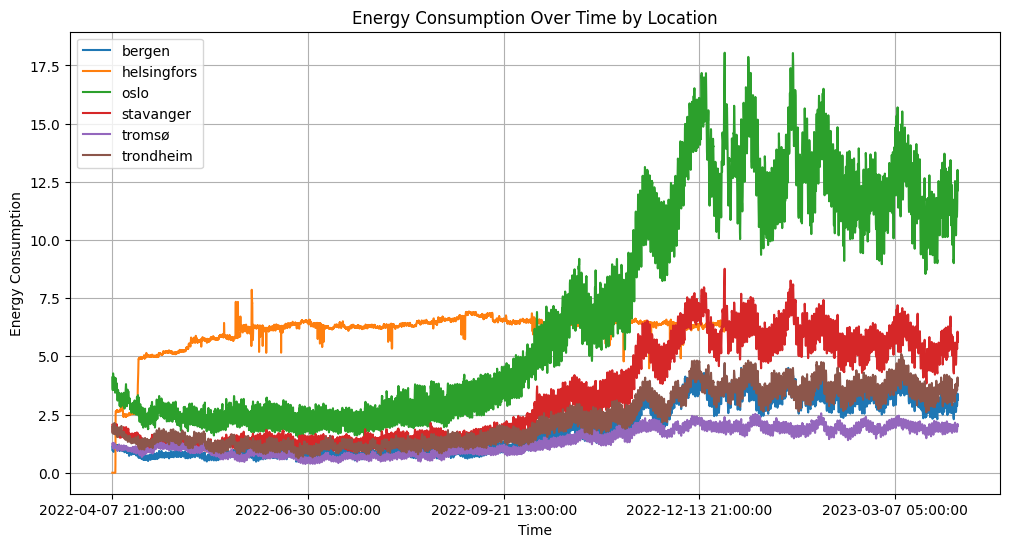

In [22]:
# Use the Pandas plot function to create the line plot
data.groupby('location')['consumption'].plot(legend=True, figsize=(12, 6))
plt.title('Energy Consumption Over Time by Location')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()


In [44]:
def is_holiday(date):
    # Define your list of holidays as a list of date strings
    holidays = ['2022-04-14', '2022-04-15', '2022-04-16', '2022-04-17', '2022-04-18', '2022-05-01', '2022-05-17', '2022-05-26', '2022-06-04', '2022-06-05', '2022-06-06', '2022-12-24', '2022-12-25', '2022-12-26', '2022-12-31', '2023-01-01', '2023-01-02']
    return date.strftime('%Y-%m-%d') in holidays

data['time'] = pd.to_datetime(data['time'])  # Ensure 'time' is in datetime format
data['is_holiday'] = data['time'].apply(is_holiday)

def is_weekend(date):
    return date.weekday() >= 5  # 5 and 6 correspond to Saturday and Sunday

data['is_weekend'] = data['time'].apply(is_weekend)
data.to_csv('/content/drive/MyDrive/AnvendtDS/consumption_temp_with_flags.csv', index=False)